In [3]:
boxwoods = [:smallSet, :largeSet]
input = [:labor, :wood]
profit = Dict( zip( boxwoods, [5, 8] ) )
resource = Dict( zip( input, [160, 200] ) )

using NamedArrays
recipe_mat = [ 3 1
               2 4 ]
recipe = NamedArray( recipe_mat, (boxwoods,input), ("boxwoods","input",) )
;

using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, productNum[boxwoods] >= 0 )
@expression(m, total_profit, sum( profit[b]*productNum[b] for b in boxwoods) )
@constraint(m, constr[r in input], sum( recipe[b,r]*productNum[b] for b in boxwoods ) <= resource[r] )
@objective(m, Max, total_profit )

solve(m)
println(getvalue(productNum))
println("Total profit is: \$", getvalue(total_profit))

productNum: 1 dimensions:
[smallSet] = 24.0
[largeSet] = 44.0
Total profit is: $472.0


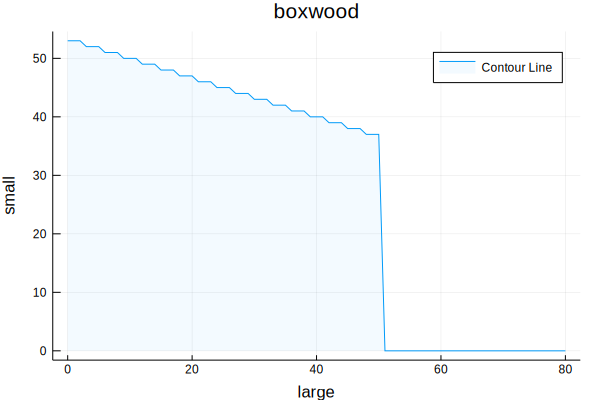

In [8]:
using Plots
x = collect(0:1:80) # large set
y = [] # small set
max = 0
for i in x
    max = 0
    limit = round((160 .- i)/3)
    for j in range(0, limit)
        if(4i+j <= 200)
            max = limit
        end
    end
    push!(y, max)
end
Plots.plot(x, y, fill=(0, 0.05, :auto), label="Contour Line", title="boxwood", xlabel = "large", ylabel = "small")

In [4]:
using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, s >= 0)                        # small boxwood
@variable(m, l >= 0)                        # large boxwood
@constraint(m, labor,   3s + 2l <= 160)    # total label
@constraint(m, material,  1s + 4l <= 200)    # total number of plaques
@objective(m, Max, 5s+8l)                # maximize profit

status = solve(m)

display(m)

println(status)
println("Build ", getvalue(s), " small boxwood.")
println("Build ", getvalue(l), " large boxwood.")
println("Total profit will be \$", getobjectivevalue(m))

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

Optimal
Build 24.0 small boxwood.
Build 44.0 large boxwood.
Total profit will be $472.0


Duality

In [1]:
using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, λ[1:2] >= 0)
@constraint(m, 3λ[1] + λ[2] >= 5)
@constraint(m, 2λ[1] + 4λ[2] >= 8)
@objective(m, Min, 160λ[1] + 200λ[2])

status = solve(m)

display(m)

println(status)
println("dual variables are: ", getvalue(λ))
println("Optimal objective is: ", getobjectivevalue(m))

Minimization problem with:
 * 2 linear constraints
 * 2 variables
Solver is Clp

Optimal
dual variables are: [1.2, 1.4]
Optimal objective is: 471.99999999999994
